# Introduction 

Team Members: Nicole (Cody) Peterson & Diana Roemer

The **Alzheimer's Disease and Healthy Aging Data** is sourced from the [CDC Website](https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Data/hfr9-rurv/about_data). 

This dataset is particularly interesting and important for several reasons:

*   **Alzheimer's disease and related dementias pose a significant and growing public health challenge**. As the population ages, the prevalence of these conditions increases, placing a heavy burden on individuals, families, and healthcare systems.

*   Understanding the factors that contribute to cognitive decline is crucial for developing effective **prevention and intervention strategies**.

*   This project leverages data collected through the **Behavioral Risk Factor Surveillance System (BRFSS)**, the nation’s premier system of health-related telephone surveys. Their website, including how they collect their survey data can be found [here](https://www.cdc.gov/brfss/data_documentation/index.htm). 

*   **Surveys and data collection are essential to addressing public health needs**, allowing us to monitor trends, identify risk factors, and evaluate the impact of interventions. The BRFSS, with its extensive reach and continuous data collection, provides a valuable resource for understanding the health-related risk behaviors, chronic health conditions, and use of preventive services among U.S. residents.

## Dataset Overview

The dataset consists of **284,142** observations related to **Alzheimer's Disease and Healthy Aging**. The dataset includes information gathered from **2015 to 2022**.

Key features of the dataset include:

*   **Demographic Information**: Age, sex, and race/ethnicity of respondents.
*   **Health-Related Indicators**: Data on overall health, physical health, mental health, and specific conditions.
*   **Behavioral Risk Factors**: Information on smoking and alcohol use, including binge drinking.
*   **Cognitive Health Measures**: Data related to subjective cognitive decline and memory loss.
*   **Caregiving Variables**: Information on whether respondents provide care for someone with cognitive impairment.
*   **Geographic Location**: Location data at the state and territory level, along with latitude and longitude coordinates.

The data is organized with a variety of identifiers and values:

*   **Descriptive Variables**: 'Class', 'Topic', 'Question', 'Location', and stratification categories provide detailed information about the data.
*   **Value and Statistical Measures**: 'Data_Value' represents the actual data point, with associated confidence limits ('Low_Confidence_Limit', 'High_Confidence_Limit').
*   **Unique Identifiers**: Columns like 'ClassID', 'TopicID', 'QuestionID', and 'LocationID' serve as keys for data processing and linking related information.
*   **Stratification**: Data is stratified by different categories (e.g., age groups like 50-64 and 65+, race/ethnicity) to allow for detailed analysis of specific subpopulations.


## Objective & Outcome

This project's primary objective is:

**To construct and evaluate machine learning models that predict the likelihood of subjective cognitive decline or memory loss among older adults, using a combination of demographic, health-related, and behavioral factors available in the Alzheimer's Disease dataset.**

Methods: This objective will involve **data preprocessing, feature selection, and the application of several supervised learning algorithms, including at least two artificial neural networks**. Model performance will be assessed using appropriate metrics, and the most influential predictive factors will be identified.

**Expected Outcome**: A well-performing predictive model that provides insights into possible determinants of cognitive decline in older adults, along with a discussion of the model's limitations and potential for real-world application.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import adjusted_rand_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore") 

# Load the dataset 
adha = pd.read_csv('Alzheimers_Disease_Healthy_Aging.csv')

# Display first 5 rows
adha.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2015~2015~01~Q32~TOC07~AGE~RACE,2015,2015,AL,Alabama,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,...,"Black, non-Hispanic",POINT (-86.63186076199969 32.84057112200048),C01,TOC07,Q32,1,AGE,5064,RACE,BLK
1,BRFSS~2015~2015~01~Q33~TOC08~AGE~RACE,2015,2015,AL,Alabama,BRFSS,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,%,...,"White, non-Hispanic",POINT (-86.63186076199969 32.84057112200048),C01,TOC08,Q33,1,AGE,5064,RACE,WHT
2,BRFSS~2015~2015~01~Q44~TOC12~AGE~SEX,2015,2015,AL,Alabama,BRFSS,Overall Health,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,%,...,Female,POINT (-86.63186076199969 32.84057112200048),C01,TOC12,Q44,1,AGE,65PLUS,SEX,FEMALE
3,BRFSS~2015~2015~01~Q18~TSC08~AGE~SEX,2015,2015,AL,Alabama,BRFSS,Screenings and Vaccines,Influenza vaccine within past year,Percentage of older adults who reported influe...,%,...,Female,POINT (-86.63186076199969 32.84057112200048),C03,TSC08,Q18,1,AGE,5064,SEX,FEMALE
4,BRFSS~2015~2015~01~Q37~TGC02~AGE~RACE,2015,2015,AL,Alabama,BRFSS,Caregiving,Expect to provide care for someone in the next...,Percentage of older adults currently not provi...,%,...,"White, non-Hispanic",POINT (-86.63186076199969 32.84057112200048),C07,TGC02,Q37,1,AGE,AGE_OVERALL,RACE,WHT


In [3]:
# Check data types and missing values
print(adha.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

## Data Cleaning

The initial dataset contains a large amount of information, necessitating a reduction to focus on the most relevant aspects for the project. Many columns have a large number of blank entries, while others are complete. To create a manageable and insightful analysis, the project will focus on the following columns:

*   **YearStart**: Starting year of the data collection period.
*   **YearEnd**: Ending year of the data collection period.
*   **LocationAbbr**: Abbreviated location (e.g., state or region).
*   **Class**: General classification of the data (e.g., Caregiving, Cognitive Decline, Overall Health, Mental Health, Smoking and Alcohol Use, Nutrition/Physical Activity/Obesity).
*   **Topic**: Specific topic related to the class.
*   **Question**: The question asked in the survey.
*   **DataValueTypeID**: Type of data value recorded (percentage or mean).
*   **Data\_Value**: The actual data value or estimate.

*   **StratificationCategory1**: First stratification category (Age Group).
*   **Stratification1**: First stratification value (specific age group).
*   **StratificationCategory2**: Second stratification category (Race/ethnicity, Sex).
*   **Stratification2**: Second stratification value, if applicable.


In [5]:
# Define the list of columns to keep
columns_to_keep = [
    'YearStart',
    'YearEnd',
    'LocationAbbr',
    'Class',
    'Topic',
    'Question',
    'DataValueTypeID',
    'Data_Value',
    'StratificationCategory1',
    'Stratification1',
    'StratificationCategory2',
    'Stratification2', 
]

# Create a new DataFrame with only the specified columns
adha_trimmed = adha[columns_to_keep]

### Focusing on `Data_Value` and Handling Missing Values

Given that a significant portion of the analysis will rely on the `Data_Value` column, it's necessary to address missing or blank values in this column. To ensure the integrity of subsequent analyses, **rows with missing `Data_Value` entries will be removed**. 


In [7]:
# Remove rows with missing values in the 'Data_Value' column
adha_trimmed = adha_trimmed.dropna(subset=['Data_Value'])

# Display shape of updated dataframe
adha_trimmed.shape

(192808, 12)

In [8]:
# Check data types and missing values
print(adha_trimmed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 192808 entries, 0 to 284141
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                192808 non-null  int64  
 1   YearEnd                  192808 non-null  int64  
 2   LocationAbbr             192808 non-null  object 
 3   Class                    192808 non-null  object 
 4   Topic                    192808 non-null  object 
 5   Question                 192808 non-null  object 
 6   DataValueTypeID          192808 non-null  object 
 7   Data_Value               192808 non-null  float64
 8   StratificationCategory1  192808 non-null  object 
 9   Stratification1          192808 non-null  object 
 10  StratificationCategory2  156041 non-null  object 
 11  Stratification2          156041 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 19.1+ MB
None


### Exploratory Data Analysis

In [10]:
# Two columns have missing data, StratificationCategory2 and Stratification2
# Replace NaN values in 'StratificationCategory2' and 'Stratification2' with 'missing'
adha_trimmed['StratificationCategory2'] = adha_trimmed['StratificationCategory2'].fillna('missing')
adha_trimmed['Stratification2'] = adha_trimmed['Stratification2'].fillna('missing')

In [11]:
# Check data types and missing values
print(adha_trimmed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 192808 entries, 0 to 284141
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                192808 non-null  int64  
 1   YearEnd                  192808 non-null  int64  
 2   LocationAbbr             192808 non-null  object 
 3   Class                    192808 non-null  object 
 4   Topic                    192808 non-null  object 
 5   Question                 192808 non-null  object 
 6   DataValueTypeID          192808 non-null  object 
 7   Data_Value               192808 non-null  float64
 8   StratificationCategory1  192808 non-null  object 
 9   Stratification1          192808 non-null  object 
 10  StratificationCategory2  192808 non-null  object 
 11  Stratification2          192808 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 19.1+ MB
None


In [12]:
# Calculate how many values in YearStart and YearEnd are different
num_different = (adha_trimmed['YearStart'] != adha_trimmed['YearEnd']).sum()
print(f"Number of rows where YearStart and YearEnd are different: {num_different}")

# Calculate the percentage of different rows
percentage_different = (num_different / len(adha_trimmed)) * 100
print(f"Percentage of rows where YearStart and YearEnd are different: {percentage_different:.2f}%")

Number of rows where YearStart and YearEnd are different: 6213
Percentage of rows where YearStart and YearEnd are different: 3.22%


In [13]:
# Since the difference is only 3.22%, it's not significant. We'll focus on YearEnd.
# Drop the YearStart column
adha_trimmed = adha_trimmed.drop('YearStart', axis=1)

In [14]:
# Let's get an idea of what is being asked in the survey
# Group by 'Topic' and 'Question' and count occurrences
value_counts_df = adha_trimmed.groupby(['Topic', 'Question']).size().reset_index(name='Count')

# Ensure full text visibility
pd.set_option('display.max_colwidth', None)

# Display the table with Topic and Question Count
from IPython.display import display
display(value_counts_df)

,Topic,Question,Count
0,Arthritis among older adults,Percentage of older adults ever told they have arthritis,6053
1,Binge drinking within past 30 days,Percentage of older adults who reported binge drinking within the past 30 days,6640
2,Cholesterol checked in past 5 years,Percentage of older adults who had a cholesterol screening within the past 5 years,4033
3,Colorectal cancer screening,Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years,4023
4,Current smoking,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,7264
5,Diabetes screening within past 3 years,Percentage of older adults without diabetes who reported a blood sugar or diabetes test within 3 years,4378
6,"Disability status, including sensory or mobility limitations","Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)",7058
7,Duration of caregiving among older adults,Percentage of older adults who provided care to a friend or family member for six months or more,3414
8,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or more fruits daily,3893
9,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or more vegetables daily,3532


## Focusing Our Scope

Our objective is to investigate the influence of various health risk factors on mental and cognitive health outcomes. Specifically, we seek to assess the impact of the following risk factors:

- **Binge drinking**  
- **Current smoking**  
- **High blood pressure**  
- **Obesity**  

on the following conditions:  

- **Frequent mental distress**  
- **Functional difficulties associated with subjective cognitive decline or memory loss**  
- **The need for assistance with daily activities due to subjective cognitive decline or memory loss**  

By narrowing our focus to these key factors and outcomes, we can better understand potential connections.

In [16]:
relevant_questions = [
    'Percentage of older adults who reported binge drinking within the past 30 days',
    'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
    'Percentage of older adults who have ever been told by a health professional that they have high blood pressure',
    'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more',
    'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure',
    'Percentage of older adults who are experiencing frequent mental distress',
    'Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores',
    'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities',
    'Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months'
]

# Filter the dataset to only include relevant questions
filtered_adha = adha_trimmed[adha_trimmed['Question'].isin(relevant_questions)]

# Display the filtered DataFrame
print(filtered_adha.shape)  # Print the shape to confirm filtering worked
filtered_adha.head()  # Show the first few rows


(47329, 11)


,YearEnd,LocationAbbr,Class,Topic,Question,DataValueTypeID,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
9,2015,AK,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,10.6,Age Group,Overall,Sex,Female
12,2015,AZ,Nutrition/Physical Activity/Obesity,Obesity,"Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",PRCTG,31.5,Age Group,50-64 years,Sex,Female
13,2015,AZ,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,PRCTG,14.5,Age Group,50-64 years,Race/Ethnicity,Hispanic
14,2015,AZ,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge drinking within the past 30 days,PRCTG,12.2,Age Group,Overall,Sex,Male
15,2015,AZ,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,12.1,Age Group,50-64 years,Race/Ethnicity,Hispanic


### Exploring Data Counts for Key-Value Pair Setup

Before structuring the dataset into key-value pairs, it is essential to understand the distribution of data within each categorical column. By iterating through each column and retrieving value counts, we have insights into:

- **Data Consistency:** Identifying how many unique values exist within each column ensures that the dataset is structured correctly.
- **Potential Keys for Merging:** Understanding which columns have consistent categories helps setting up meaningful key-value pairs.
- **Handling Missing or Sparse Data:** If certain columns contain categories with very few occurrences, they might need to be excluded or handled differently in the next step.
- **Ensuring Data Alignment:** Checking how frequently different survey questions appear helps in determining whether a pivot or merge operation will work efficiently.


In [18]:
# Iterate through each column
for column in filtered_adha.select_dtypes(include='object'):
    # Get the value counts for the column
    value_counts = filtered_adha[column].value_counts()

    # Print the column name and its value counts
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("-" * 30)

Value counts for column 'LocationAbbr':
LocationAbbr
US      1604
WEST    1577
MDW     1543
NRE     1528
SOU     1501
NY      1075
HI       912
TX       895
MI       894
MD       863
AZ       861
OH       850
GA       845
CA       831
WA       831
OK       825
OR       814
MS       809
NM       807
UT       806
CT       805
KS       804
VA       804
MN       793
SC       779
CO       779
IN       779
TN       775
NC       758
NE       756
DC       752
PA       751
FL       743
AL       738
WI       734
NJ       729
LA       727
IL       726
RI       720
MO       710
NV       707
AR       703
DE       681
ME       672
MA       668
KY       659
IA       656
AK       653
ID       650
SD       649
ND       641
MT       628
WV       615
VT       614
WY       605
NH       585
PR       572
GU       442
VI        96
Name: count, dtype: int64
------------------------------
Value counts for column 'Class':
Class
Smoking and Alcohol Use                13904
Cognitive Decline                      

## Generating functional key value pair data frame, matched by survey key

Each observation in the data frame is a survery response generated by BRFSS with primary categorization from the year of the survey and its location, and second categorization via its two stratification fields. By pairing our desired response variables to our predictor variables using set keys, we can build a data frame that allows us to assert our predictors against our response variables. For the sake of clarity, those are reiterated below.
Response Variables:
 - **Percentage of older adults who are experiencing frequent mental distress**
 - **Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores**
 - **Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities**
 - **Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months**

Predictor Variables:
 - **Percentage of older adults who reported binge drinking within the past 30 days**
 - **Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days**
 - **Percentage of older adults who have ever been told by a health professional that they have high blood pressure**
 - **Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more**
 - **Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure**

Each observation of our current data frame is a question with a data value response. Pairing the categorization and stratifications of each observations build a functional data frame for use in our models. An example is provided below.

In [21]:
sample_response = filtered_adha.loc[(filtered_adha['Question'] == "Percentage of older adults who are experiencing frequent mental distress") 
                          & (filtered_adha['LocationAbbr'] == "NY") & (filtered_adha['YearEnd'] == 2015) 
                          & (filtered_adha['Stratification1'] == "50-64 years")]
print(sample_response.shape)
sample_response.info

(6, 11)


<bound method DataFrame.info of        YearEnd LocationAbbr          Class                     Topic  \
22646     2015           NY  Mental Health  Frequent mental distress   
23674     2015           NY  Mental Health  Frequent mental distress   
25571     2015           NY  Mental Health  Frequent mental distress   
25730     2015           NY  Mental Health  Frequent mental distress   
31036     2015           NY  Mental Health  Frequent mental distress   
31594     2015           NY  Mental Health  Frequent mental distress   

                                                                       Question  \
22646  Percentage of older adults who are experiencing frequent mental distress   
23674  Percentage of older adults who are experiencing frequent mental distress   
25571  Percentage of older adults who are experiencing frequent mental distress   
25730  Percentage of older adults who are experiencing frequent mental distress   
31036  Percentage of older adults who are experi

As seen in the block above, the survery responses are provided by category. In this example:
1. The survey from **2015**
2. Containing responses from **NY**
3. Targeting **50-64 year** old people
4. Stratified by
    - *Male*
    - *Female*
    - *White, non-Hispanic*
    - *Black, non-Hispanic*
    - *Hispanic*
5. Asked the question **Percentage of older adults who are experiencing frequent mental distress**
6. And recorded their responses as a ***DataValue***

This means we can draw a correlation between any observations following the same critera defined in steps 1-4 outlined above. Because these surveys are treated as percentages of the population responding to the specific question, we don't need to worry about direct relation between the observations, and can treat the observations as collective results from a specific subset of the population.

This means that any multiple observations following the same categorization and stratifications can be treated as a single observation, seen by the following:
1. The survey from **An Identical Year** (**YearEnd**)
2. Containing responses from **An Identical Location** (**LocationAbbr**)
3. Asked **Identically Aged People** people (**Stratification1**)
4. Stratified by (**Stratification2**)
    - *Male*
    - *Female*
    - *White, non-Hispanic*
    - *Black, non-Hispanic*
    - *Hispanic*
    - *etc*
5. Can be asked any number of **Questions**
6. And each of their responses as a ***DataValue*** for that unique observation

### Generating a functional data set of predictors and responses

The following function builds a data frame of observations by merging independent dataframes with matching key observations to create a new observation with multiple **DataValues** corresponding to appropriate predictors and responses. The function takes an initial target data frame, **df**, a list of our response questions, **response**, a list of our predictor questions, **predictor**, and finally the merge function, **merge**, to determine how the merge function treats unmatched key pairs. 'left' merges the incoming DataValue regardless of all keys matching, and thus creates a dataframe with  `nan` values as empty spaces where the key pairs aren't perfectly matched, while 'inner' only merges values with perfectly matching key pairs. That is, if the response variable and the predictor variable don't match for YearEnd, LocationAbbr, Stratification1, ***and*** Stratification2, then the new resultant dataframe will not contain either of the observations. As a result, the call of the function below defines the shape of the two data frames and provides some insight into how they operate for our models.

This merge was built as a function, instead of hand coded, to allow for greater modularity and flexibility in incorporating new response or predictor variables after the models are built. 

In [24]:
# Define response variables (dependent variables)
# These represent the cognitive and mental health outcomes we are trying to predict
response = [
    'Percentage of older adults who are experiencing frequent mental distress',
    'Percentage of older adults who reported subjective cognitive decline or memory loss that interferes with their ability to engage in social activities or household chores',
    'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities',
    'Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months'
]

# Define predictor variables (independent variables)
# These represent health risk factors that may contribute to cognitive decline or mental distress
predictor = [
    'Percentage of older adults who reported binge drinking within the past 30 days',
    'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days',
    'Percentage of older adults who have ever been told by a health professional that they have high blood pressure',
    'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more',
    'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure'
]

def generate_multi_response_df(df, response, predictor, merge):
    """
    This function merges response (outcome) variables and predictor (risk factor) variables 
    into a structured DataFrame where each row represents a unique observation.
    
    Parameters:
    - df: DataFrame containing the survey data
    - response: List of response variable questions (dependent variables)
    - predictor: List of predictor variable questions (independent variables)
    - merge: String ('left' or 'inner'), determining how to handle unmatched observations:
        - 'left': Keeps all records from the response variable with NaN for unmatched predictors
        - 'inner': Keeps only records where all response and predictor variables have matching data
    
    Returns:
    - new_df: Merged DataFrame containing structured response and predictor values
    """

    # Initialize tracking variables
    biggest = 0  # Stores the largest response variable dataset (used as the base)
    biggest_index = response[0]  # Defaults to the first response variable
    new_df = pd.DataFrame()  # Placeholder for the new structured dataset

    # Loop through each response variable to find the one with the most data
    for resp in response:
        value_counts = df.loc[(df['Question'] == resp)]
        if value_counts.shape[0] > biggest:
            biggest = value_counts.shape[0]
            new_df = value_counts  # Use this as the base dataset

    # Rename columns to differentiate response variables
    new_df = new_df.rename(columns={'Data_Value': 'R_Data_Value_0', 'Question': 'R_Question_0'})

    # Merge the remaining response variables with the base response dataset
    counter = 1  # Track the response variable number
    for other_responses in response:
        if other_responses != biggest_index:  # Skip the base dataset
            temp_df = df.loc[(df['Question'] == other_responses)]
            
            # Merge based on year, location, and stratification
            merged_df = pd.merge(
                new_df, 
                temp_df[['YearEnd', 'LocationAbbr', 'Stratification1', 'Stratification2', 'Question', 'Data_Value']],
                on=['YearEnd', 'LocationAbbr', 'Stratification1', 'Stratification2'], 
                how=merge
            )
            
            # Rename columns for clarity
            new_df = merged_df.rename(columns={'Data_Value': f'R_Data_Value_{counter}', 'Question': f'R_Question_{counter}'})
            counter += 1

    # Merge predictor variables into the dataset
    counter = 0  # Reset counter for predictor variables
    for preds in predictor:
        temp_df = df.loc[(df['Question'] == preds)]
        
        # Merge predictor variables based on the same key fields
        merged_df = pd.merge(
            new_df, 
            temp_df[['YearEnd', 'LocationAbbr', 'Stratification1', 'Stratification2', 'Question', 'Data_Value']],
            on=['YearEnd', 'LocationAbbr', 'Stratification1', 'Stratification2'], 
            how=merge
        )
        
        # Rename columns for clarity
        new_df = merged_df.rename(columns={'Data_Value': f'P_Data_Value_{counter}', 'Question': f'P_Question_{counter}'})
        counter += 1

    return new_df
    
# Create two versions of the dataset:
# 'left' merge retains all response variables, even if some predictors are missing
# 'inner' merge keeps only observations where all response and predictor values exist
spaced_df = generate_multi_response_df(filtered_adha, response, predictor, 'left')
single_df = generate_multi_response_df(filtered_adha, response, predictor, 'inner')

# Print the resulting dataset shapes to check how many records were kept
print("Dataset with left merge:", spaced_df.shape)
print("Dataset with inner merge:", single_df.shape)


Dataset with left merge: (9009, 27)
Dataset with inner merge: (1503, 27)


In [25]:
print(spaced_df.columns.tolist())
print(" -------------------- Single sample observation -------------------- ")
print(spaced_df.loc[0])
# Notice how R_Question_1 : R_Data_Value_3 are NaN
print(" -------------------- Detailed info on df -------------------- ")
print(spaced_df.info)

['YearEnd', 'LocationAbbr', 'Class', 'Topic', 'R_Question_0', 'DataValueTypeID', 'R_Data_Value_0', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'R_Question_1', 'R_Data_Value_1', 'R_Question_2', 'R_Data_Value_2', 'R_Question_3', 'R_Data_Value_3', 'P_Question_0', 'P_Data_Value_0', 'P_Question_1', 'P_Data_Value_1', 'P_Question_2', 'P_Data_Value_2', 'P_Question_3', 'P_Data_Value_3', 'P_Question_4', 'P_Data_Value_4']
 -------------------- Single sample observation -------------------- 
YearEnd                                                                                                                                                                2015
LocationAbbr                                                                                                                                                             AK
Class                                                                                                                      

In [26]:
print(single_df.columns.tolist())
print(" -------------------- Single sample observation -------------------- ")
print(single_df.loc[0])
print(" -------------------- Detailed info on df -------------------- ")
print(single_df.info)

['YearEnd', 'LocationAbbr', 'Class', 'Topic', 'R_Question_0', 'DataValueTypeID', 'R_Data_Value_0', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'R_Question_1', 'R_Data_Value_1', 'R_Question_2', 'R_Data_Value_2', 'R_Question_3', 'R_Data_Value_3', 'P_Question_0', 'P_Data_Value_0', 'P_Question_1', 'P_Data_Value_1', 'P_Question_2', 'P_Data_Value_2', 'P_Question_3', 'P_Data_Value_3', 'P_Question_4', 'P_Data_Value_4']
 -------------------- Single sample observation -------------------- 
YearEnd                                                                                                                                                                                         2015
LocationAbbr                                                                                                                                                                                      GA
Class                                                                    

### Identifying Patterns in Health Risk Factors Using Clustering

In this step, we are uncovering patterns among health risk factors by applying **K-Means clustering**. The goal is to group similar data points based on their predictor variables, which represent different health behaviors and conditions.

#### **Why Are We Doing This?**
- **Identify Risk Factor Profiles**: Clustering helps us determine whether there are distinct groups of populations with similar health risk behaviors (e.g., high obesity and smoking rates occurring together).
- **Reduce Complexity**: Instead of analyzing individual predictors separately, clustering allows us to find meaningful groupings, making it easier to interpret relationships.
- **Prepare for Further Analysis**: These clusters can be used to analyze how different risk factor profiles relate to cognitive decline and mental health outcomes.

#### **What Are We Doing?**
1. **Selecting Relevant Features**  
   - We extract only the predictor values (`P_Data_Value_0` to `P_Data_Value_4`), which represent health behaviors like smoking, obesity, and high blood pressure.
   - Response variables are not included at this stage since we are clustering based on risk factor patterns.

2. **Standardizing the Data**  
   - Since different health risk factors have different numerical ranges, we apply `StandardScaler()` to ensure that all features contribute equally to the clustering process.

3. **Finding the Optimal Number of Clusters**  
   - We will use the **Elbow Method**, which calculates the **Within-Cluster Sum of Squares (WCSS)** for different cluster numbers.
   - The optimal number of clusters is identified where adding more clusters results in diminishing improvements (the "elbow" point on the graph).


In [28]:
# Select relevant features for clustering
features = ['P_Data_Value_0', 'P_Data_Value_1', 'P_Data_Value_2', 'P_Data_Value_3', 'P_Data_Value_4']
X = spaced_df[features].dropna()


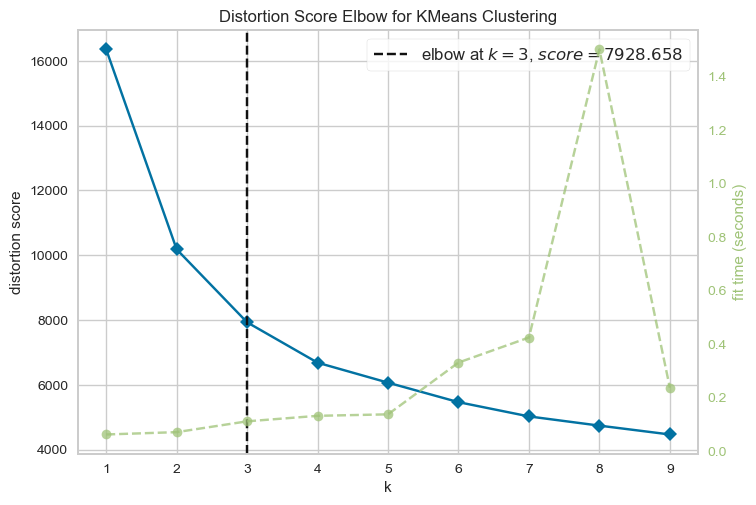

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans
kmeans = KMeans(random_state=42, n_init=10)

# Use the ElbowVisualizer to determine the optimal number of clusters
visualizer = KElbowVisualizer(kmeans, k=(1, 10))  # Testing for 1 to 10 clusters
visualizer.fit(X_scaled)  # Fit the data to the visualizer
visualizer.show()  # Display the plot

In [30]:
# Reset index after dropping rows
X_reset = X.reset_index(drop=True)

# Apply K-means clustering
optimal_clusters = 3  # Choose based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the filtered DataFrame
X_reset['Cluster'] = clusters

# Merge back with the original DataFrame to keep the structure
spaced_df = spaced_df.merge(X_reset[['Cluster']], left_index=True, right_index=True, how='left')

# View the updated DataFrame
spaced_df.head()

,YearEnd,LocationAbbr,Class,Topic,R_Question_0,DataValueTypeID,R_Data_Value_0,StratificationCategory1,Stratification1,StratificationCategory2,...,P_Data_Value_0,P_Question_1,P_Data_Value_1,P_Question_2,P_Data_Value_2,P_Question_3,P_Data_Value_3,P_Question_4,P_Data_Value_4,Cluster
0,2015,AK,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,10.6,Age Group,Overall,Sex,...,8.7,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,16.4,Percentage of older adults who have ever been told by a health professional that they have high blood pressure,44.6,"Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",32.5,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure,80.7,2.0
1,2015,AZ,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,12.1,Age Group,50-64 years,Race/Ethnicity,...,10.3,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,14.5,Percentage of older adults who have ever been told by a health professional that they have high blood pressure,40.9,"Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",42.2,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure,77.3,2.0
2,2015,AZ,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,22.8,Age Group,Overall,Race/Ethnicity,...,NaN,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,24.8,Percentage of older adults who have ever been told by a health professional that they have high blood pressure,67.7,"Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",28.1,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure,88.6,1.0
3,2015,GA,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,8.2,Age Group,65 years or older,missing,...,4.1,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,10.2,Percentage of older adults who have ever been told by a health professional that they have high blood pressure,69.3,"Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",29.7,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure,95.3,1.0
4,2015,ND,Mental Health,Frequent mental distress,Percentage of older adults who are experiencing frequent mental distress,PRCTG,5.1,Age Group,65 years or older,missing,...,5.1,Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days,8.3,Percentage of older adults who have ever been told by a health professional that they have high blood pressure,61.6,"Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more",30.9,Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure,94.5,2.0


Adjusted Rand Index between K-means and GMM: 0.70


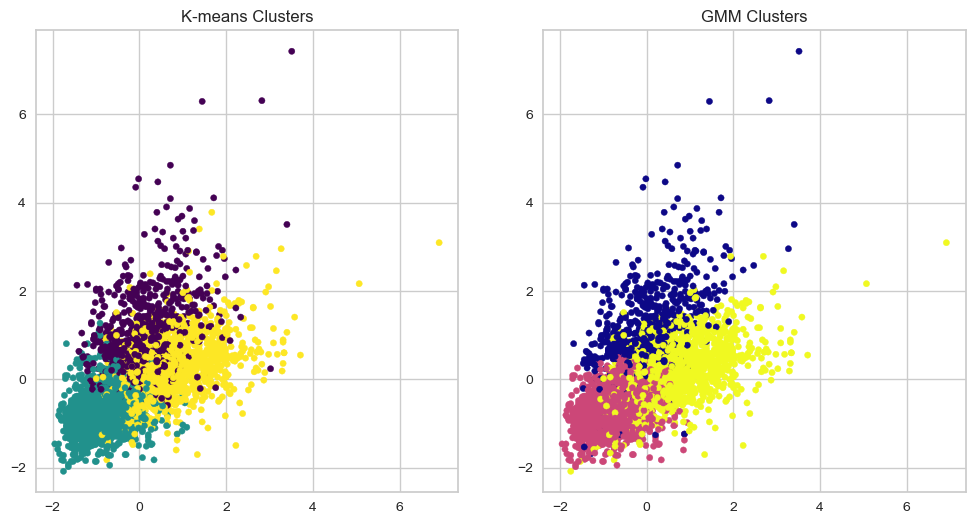

In [31]:
# Fit a GMM to the data
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Add GMM cluster labels
X_reset['GMM_Cluster'] = gmm_clusters

# Merge back with the original DataFrame
spaced_df = spaced_df.merge(X_reset[['GMM_Cluster']], left_index=True, right_index=True, how='left')

# Compare cluster assignments
kmeans_labels = X_reset['Cluster']
gmm_labels = X_reset['GMM_Cluster']

# Use the Adjusted Rand Index to compare cluster similarity
ari_score = adjusted_rand_score(kmeans_labels, gmm_labels)

print(f"Adjusted Rand Index between K-means and GMM: {ari_score:.2f}")

# Visualize the cluster distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('K-means Clusters')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='plasma', s=20)
plt.title('GMM Clusters')

plt.show()

Adjusted Rand Index between K-means and GMM: 0.70

### The Adjusted Rand Index (ARI) ranges from -1 to 1, where:

- **1** means perfect cluster agreement.
- **0** means random cluster assignments.
- **Negative values** indicate worse than random clustering.

A score of **0.70** suggests substantial agreement between K-means and GMM. Both models identified similar structures in the data, but not identical ones. This is consistent with the nature of the dataset, as the Alzheimer's Disease data contains a mix of categorical and continuous features, which might not form perfectly distinct or spherical clusters. Here's why the two models show some differences:

- **K-means** forces clusters to be spherical and of equal size, which can be limiting for complex data distributions like those in this project.
- **GMM** is more flexible, as it models elliptical, overlapping clusters with probabilistic boundaries, which is better suited for capturing nuanced patterns, especially when dealing with diverse health-related and behavioral factors in cognitive decline.

The similarity in clustering structures between K-means and GMM indicates that the factors influencing cognitive decline are relatively consistent across the population in the dataset, but the more flexible GMM model provides a more refined view of these influences.


In [35]:
# Drop rows with missing values for both X and y
X_y_df = spaced_df[['P_Data_Value_0', 'P_Data_Value_1', 'P_Data_Value_2', 
                    'P_Data_Value_3', 'P_Data_Value_4', 'R_Data_Value_0']].dropna()

# Split features and target again
X = X_y_df[['P_Data_Value_0', 'P_Data_Value_1', 'P_Data_Value_2', 
            'P_Data_Value_3', 'P_Data_Value_4']]
y = X_y_df['R_Data_Value_0']

# Standardize features
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.8267 - mae: 9.9187 - val_loss: 43.0401 - val_mae: 5.4799
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 33.1930 - mae: 4.6779 - val_loss: 14.3077 - val_mae: 3.0108
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 13.8258 - mae: 2.9881 - val_loss: 10.7978 - val_mae: 2.5767
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 10.0371 - mae: 2.4980 - val_loss: 8.9710 - val_mae: 2.3236
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 8.1858 - mae: 2.2234 - val_loss: 7.9439 - val_mae: 2.1738
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 8.0794 - mae: 2.1784 - val_loss: 7.1334 - val_mae: 2.0374
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 6.8111 - mae: 1.9754 - val_loss: 6.5853 - val_mae: 1.9298
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 6.2490 - mae: 1.8420 - val_loss: 6.2127 - val_mae: 1.8629
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/ste

In [37]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test MAE: {mae:.2f}')

# Make predictions
y_pred = model.predict(X_test)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 4.1390 - mae: 1.5216
Test Loss: 4.56
Test MAE: 1.54
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


### Artificial Neural Network (ANN) Model Performance:

- **Training Loss: ~4.2**: This value indicates how well the model fits the training data. A training loss of ~4.2 suggests that the model is capturing the underlying patterns in the Alzheimer's Disease dataset, particularly in terms of the relationships between health-related factors (e.g., obesity, smoking, blood pressure, binge drinking) and cognitive decline. A lower training loss is preferred, as it signifies better fitting, meaning the model is effectively learning from the provided data.

- **Test Loss: ~4.7**: The test loss reflects how well the model generalizes to unseen data, such as new data points not included in training. A test loss of ~4.7 suggests that the model is performing well on new, unseen data, with a small gap between training and test loss, which indicates minimal overfitting. In the context of this project, minimal overfitting is important, as it means that the model is not just memorizing specific patterns in the training data, but rather generalizing well to broader trends related to cognitive decline.

- **Mean Absolute Error (MAE): ~1.5**: This value tells us how close the model's predictions are to the actual values, on average. With an MAE of ~1.5, the model’s predictions are off by approximately 1.5 percentage points from the true values. In this project, where the goal is to predict the likelihood of cognitive decline, an MAE of ~1.5 means that the model is fairly accurate in predicting the percentage of older adults who may experience cognitive decline or memory loss, based on health-related behaviors and demographic factors. This level of accuracy is valuable for identifying trends and potential risk factors that could inform interventions.

These results suggest that the ANN model is successfully capturing the relationships within the Alzheimer's Disease dataset and is able to predict cognitive decline outcomes with reasonable accuracy. The relatively small gap between training and test loss, alongside the MAE, shows the model's strong generalization ability, which is critical for real-world application in healthcare.


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step


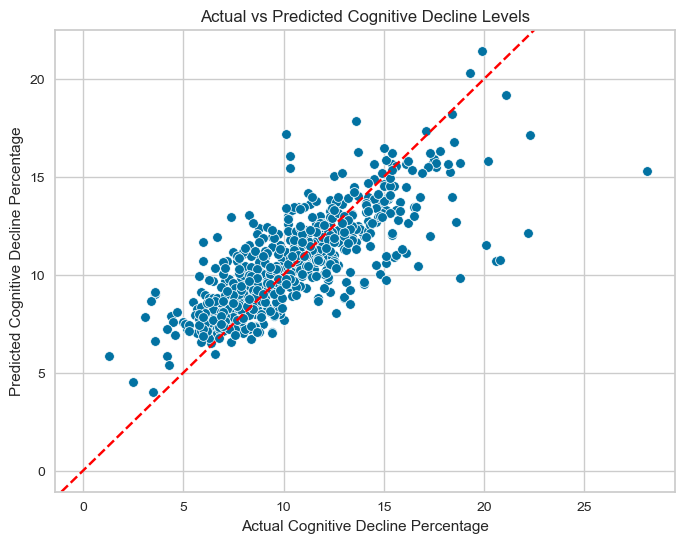

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert to DataFrame for easier visualization
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Predicted'])
plt.xlabel("Actual Cognitive Decline Percentage")
plt.ylabel("Predicted Cognitive Decline Percentage")
plt.title("Actual vs Predicted Cognitive Decline Levels")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Perfect prediction line
plt.show()



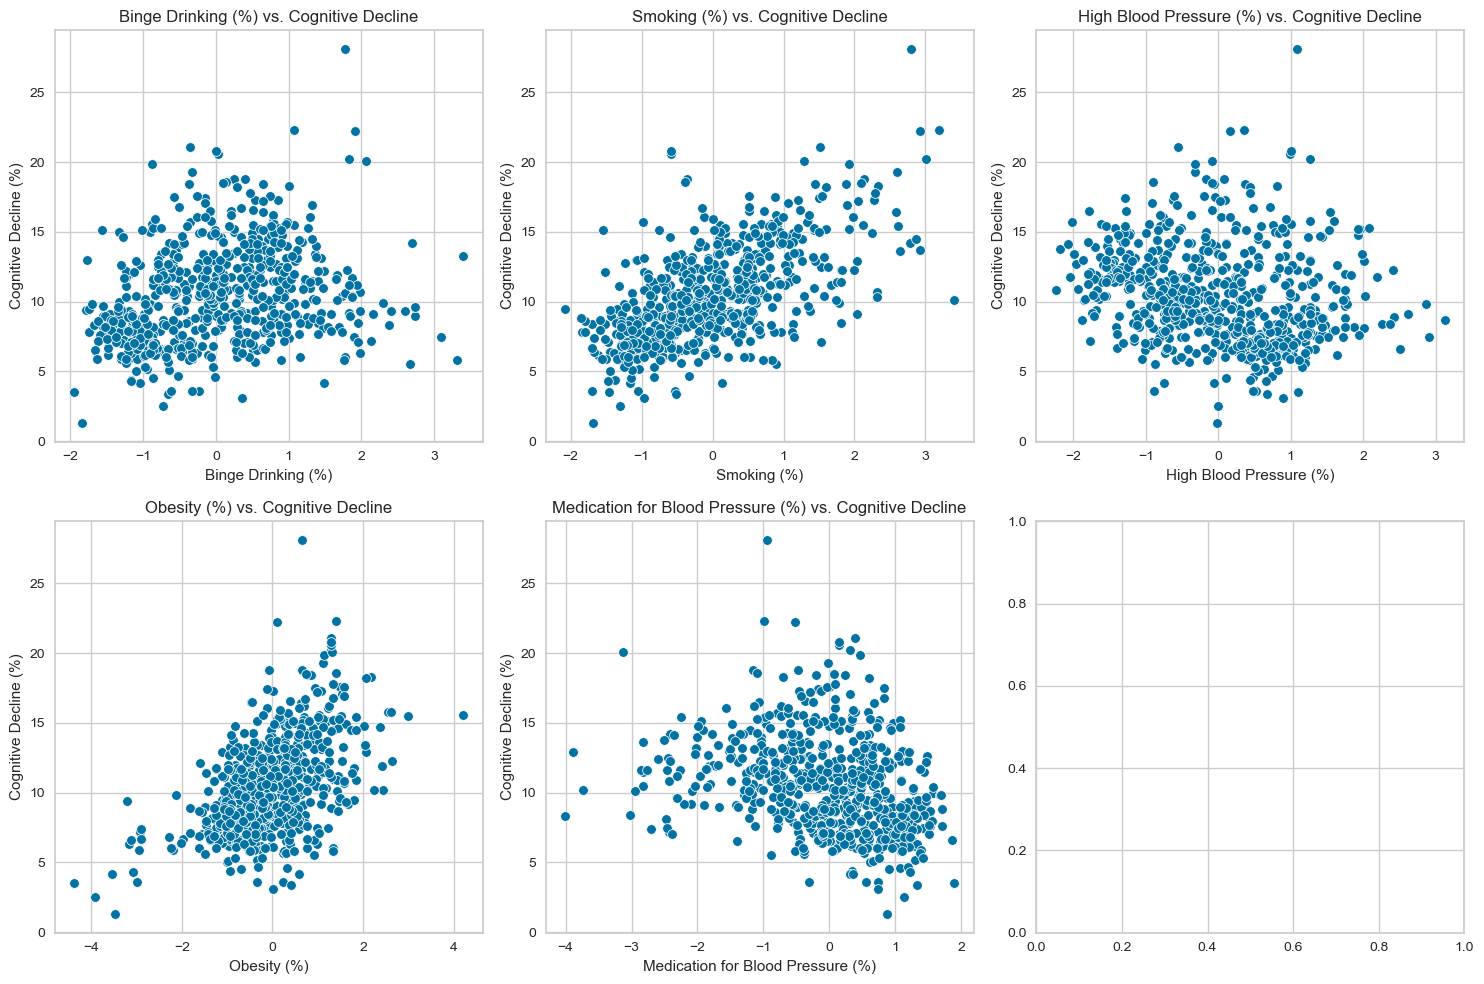

In [40]:
# Define predictor variable names
predictor_names = [
    "Binge Drinking (%)", "Smoking (%)", "High Blood Pressure (%)", 
    "Obesity (%)", "Medication for Blood Pressure (%)"
]

# Create scatter plots for each predictor
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.scatterplot(x=X_test[:, i], y=y_test, ax=axes[i])
    axes[i].set_xlabel(predictor_names[i])
    axes[i].set_ylabel("Cognitive Decline (%)")
    axes[i].set_title(f"{predictor_names[i]} vs. Cognitive Decline")

plt.tight_layout()
plt.show()


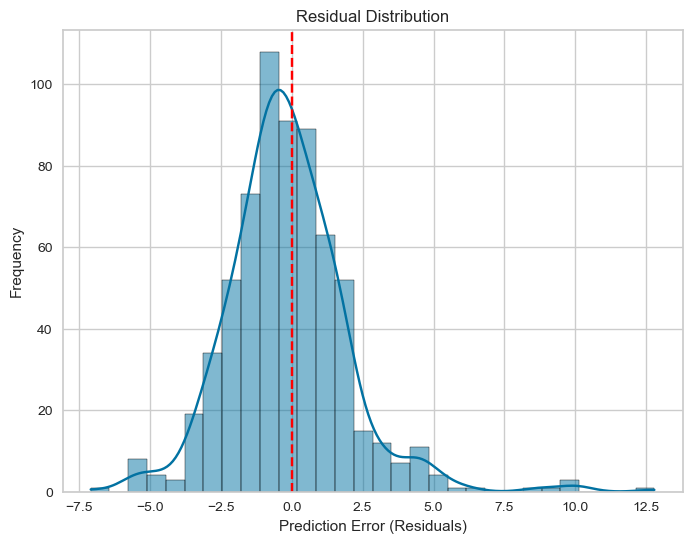

In [41]:
# Compute residuals
residuals = results_df['Actual'] - results_df['Predicted']

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


### Visualizing Predictor Variables and Residuals

The scatter plots were created to visually explore the relationship between the predictor variables and the target variable, cognitive decline. By plotting each predictor (such as binge drinking, smoking, blood pressure, obesity, and medication for blood pressure) against the predicted cognitive decline, we can observe how each health-related behavior might correlate with the likelihood of cognitive issues in older adults. These visualizations help us understand which factors have more direct associations with cognitive decline, which is key for building effective predictive models.

The residual plot further examines the accuracy of our model’s predictions. By plotting the residuals (the difference between the actual and predicted values), we assess the error distribution of the model. A well-performing model will have residuals that are centered around zero, with no distinct patterns. The histogram shows that the residuals are roughly normally distributed with a mean of zero, suggesting that our model’s errors are random and not biased in any specific direction. This supports the idea that our model is generalizing well to unseen data.

### Next Steps: k-Nearest Neighbors (kNN)

After evaluating the performance of the artificial neural network (ANN), we are now proceeding to k-Nearest Neighbors (kNN) for further model evaluation. kNN is a simple yet effective algorithm for classification tasks that can be useful in capturing non-linear relationships in the data. Given that we have identified strong relationships between predictors like binge drinking, smoking, and cognitive decline, kNN can help refine the model’s predictions, especially for cases where the decision boundaries are not well captured by other algorithms. By using kNN, we want to see if this method improves the accuracy and predictive performance further.


## kNN Comparison Model

In [44]:
# Utilizing same data frame X_y_df from before the ANN model 
# to perform another train_test_split for kNN Model
knn_X = X_y_df[['P_Data_Value_0', 'P_Data_Value_1', 'P_Data_Value_2', 
            'P_Data_Value_3', 'P_Data_Value_4']]
knn_y = X_y_df['R_Data_Value_0']

# Standardize the features
knn_X_scaled = scaler.fit_transform(knn_X)

# Soplit data into new training and testing sets
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=13)


In [45]:
# Building an initial kNN model with  k=3 neighbors
knn_model = KNeighborsRegressor(n_neighbors=3, weights='uniform')
fitted_knn = knn_model.fit(knn_X_train, knn_y_train)

y_test_pred = fitted_knn.predict(knn_X_test)

mse = mean_squared_error(knn_y_test, y_test_pred)
rmse = sqrt(mse)
rmse


2.3146007920087754

In [46]:
# Evaluate KNN model’s performance 
cv_scores_initial = cross_val_score(knn_model, knn_X_train, knn_y_train, cv=5)
print(cv_scores_initial) # Prints accuracy for each fold
print("Overall accuracy: " + "{:.3%}".format(np.mean(cv_scores_initial))) # Prints overall cross-validation accuracy

[0.63606868 0.60529975 0.65687889 0.5882393  0.61997554]
Overall accuracy: 62.129%


### Manually Hypertuning k Neighbors by finding lowest RMSE

In [48]:
r2_score_list = []  # Stores R² scores for different k values
rmse_list = []  # Stores RMSE values for different k values
kvec = range(1, 150)  # Testing k values from 1 to 199 to balance performance & computation

for i in kvec:
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform', algorithm='auto')  
    y_test_pred = knn.fit(knn_X_train, knn_y_train).predict(knn_X_test)  # Train & predict for each k
    
    r2_test = r2_score(knn_y_test, y_test_pred)  # Compute R² score (higher is better)
    rmse = sqrt(mean_squared_error(knn_y_test, y_test_pred))  # Compute RMSE (lower is better)
    
    r2_score_list.append(r2_test)  # Store R² for plotting
    rmse_list.append(rmse)  # Store RMSE for comparison

In [49]:
min_k = rmse_list.index(min(rmse_list)) # Finding index of the minimum value of RMSE
max_k = r2_score_list.index(max(r2_score_list)) # Find the index of the maximum value of R2 score
print("Index of smallest RMSE: " + str(min_k))
print("Index of largest R2 score: " + str(max_k))

Index of smallest RMSE: 33
Index of largest R2 score: 33


In [50]:
# kNN Model Implementation with k=25
knn_tuned = KNeighborsRegressor(n_neighbors=25, weights='uniform') 
fitted_knn = knn_tuned.fit(knn_X_train, knn_y_train)

# Generate predictions
y_test_pred = fitted_knn.predict(knn_X_test)

In [51]:

cv_scores = cross_val_score(knn_tuned, knn_X_train, knn_y_train, cv=5)  # Perform 5-Fold Cross-Validation
print(cv_scores)  # Print accuracy scores for each fold
print("Overall accuracy: " + "{:.3%}".format(np.mean(cv_scores)))  # Compute overall mean accuracy

# After tuning hyperparameter k for our kNN model, we find our overall accuracy increases!
print("Tuning parameter k for our kNN model resulted in an increase in accuracy of: ")
print("{:.3%}".format((np.mean(cv_scores) - np.mean(cv_scores_initial))))

[0.65953304 0.6579193  0.64288511 0.62516591 0.61224935]
Overall accuracy: 63.955%
Tuning parameter k for our kNN model resulted in an increase in accuracy of: 
1.826%


### Hypertuning k neighbors parameter via GridSearch

In [53]:
parameters = {"n_neighbors": range(1, 150)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(knn_X_train, knn_y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 150)})

In [54]:
gridsearch.best_params_

{'n_neighbors': 7}

In [55]:
# kNN Model Implementation with k=7
knn_tuned = KNeighborsRegressor(n_neighbors=7, weights='uniform') 
fitted_knn = knn_tuned.fit(knn_X_train, knn_y_train)

# Generate predictions
y_test_pred = fitted_knn.predict(knn_X_test)

In [56]:
mae = mean_absolute_error(knn_y_test, y_test_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print("Variance of sample set is % s"
      %np.var(y_test_pred))
print("Variance of total set is % s"
      %np.var(y))
print("R² is % s"
      %r2_score(knn_y_test, y_test_pred))

Mean Absolute Error: 1.54
Variance of sample set is 8.140947814218132
Variance of total set is 12.437163983577895
R² is 0.6095784625894811


In [57]:
cv_scores = cross_val_score(knn_tuned, knn_X_train, knn_y_train, cv=5)  # Perform 5-Fold Cross-Validation
print(cv_scores)  # Print accuracy scores for each fold
print("Overall accuracy: " + "{:.3%}".format(np.mean(cv_scores)))  # Compute overall mean accuracy

# After tuning hyperparameter k for our kNN model, we find our overall accuracy increases!
print("Tuning parameter k for our kNN model resulted in an increase in accuracy of: ")
print("{:.3%}".format((np.mean(cv_scores) - np.mean(cv_scores_initial))))

[0.65661833 0.66277547 0.67143735 0.64774974 0.62133898]
Overall accuracy: 65.198%
Tuning parameter k for our kNN model resulted in an increase in accuracy of: 
3.069%


### kNN Hyperparameter findings

In the above blocks, an initial test kNN model is generated with k_neighbors=3 as a blind sample. After an initial round of cross-validation finding an accuracy of 62.28%, we perform two different tuning methods to find the best k_neightbors. The first is done manually by searching for the lowest RMSE/highest R² score, and then a second tuning method using scikit's GridSearch. Unsurprisingly, GridSearch has proven to be more effective at tuning k_neighbors for the kNN model, and results with a 3.069% increase in accuracy over the initial kNN model, compared to the 1.712% hand-tuned  increase. 

Using that tuned kNN, we proceed to plot our data using a similar format to the ANN model generated earlier in the project.

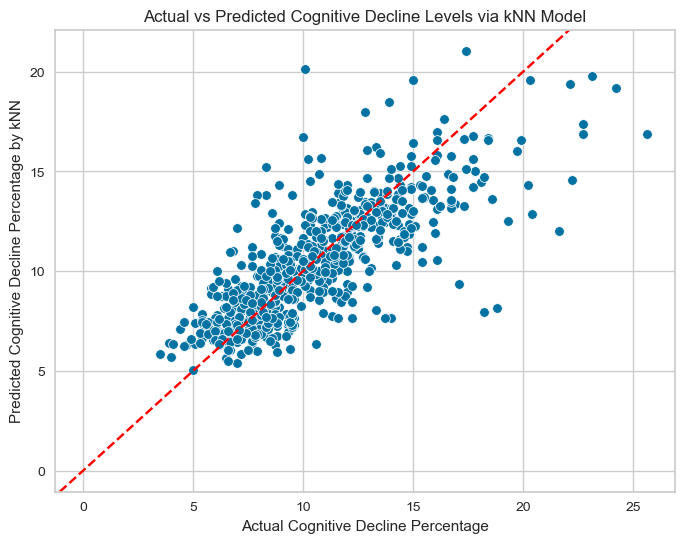

In [59]:
# Utilizing y_test_pred that was predicted just above

# Convert to DataFrame for easier visualization
knn_results_df = pd.DataFrame({'Actual': knn_y_test, 'Predicted': y_test_pred.flatten()})

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=knn_results_df['Actual'], y=knn_results_df['Predicted'])
plt.xlabel("Actual Cognitive Decline Percentage")
plt.ylabel("Predicted Cognitive Decline Percentage by kNN")
plt.title("Actual vs Predicted Cognitive Decline Levels via kNN Model")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Perfect prediction line
plt.show()


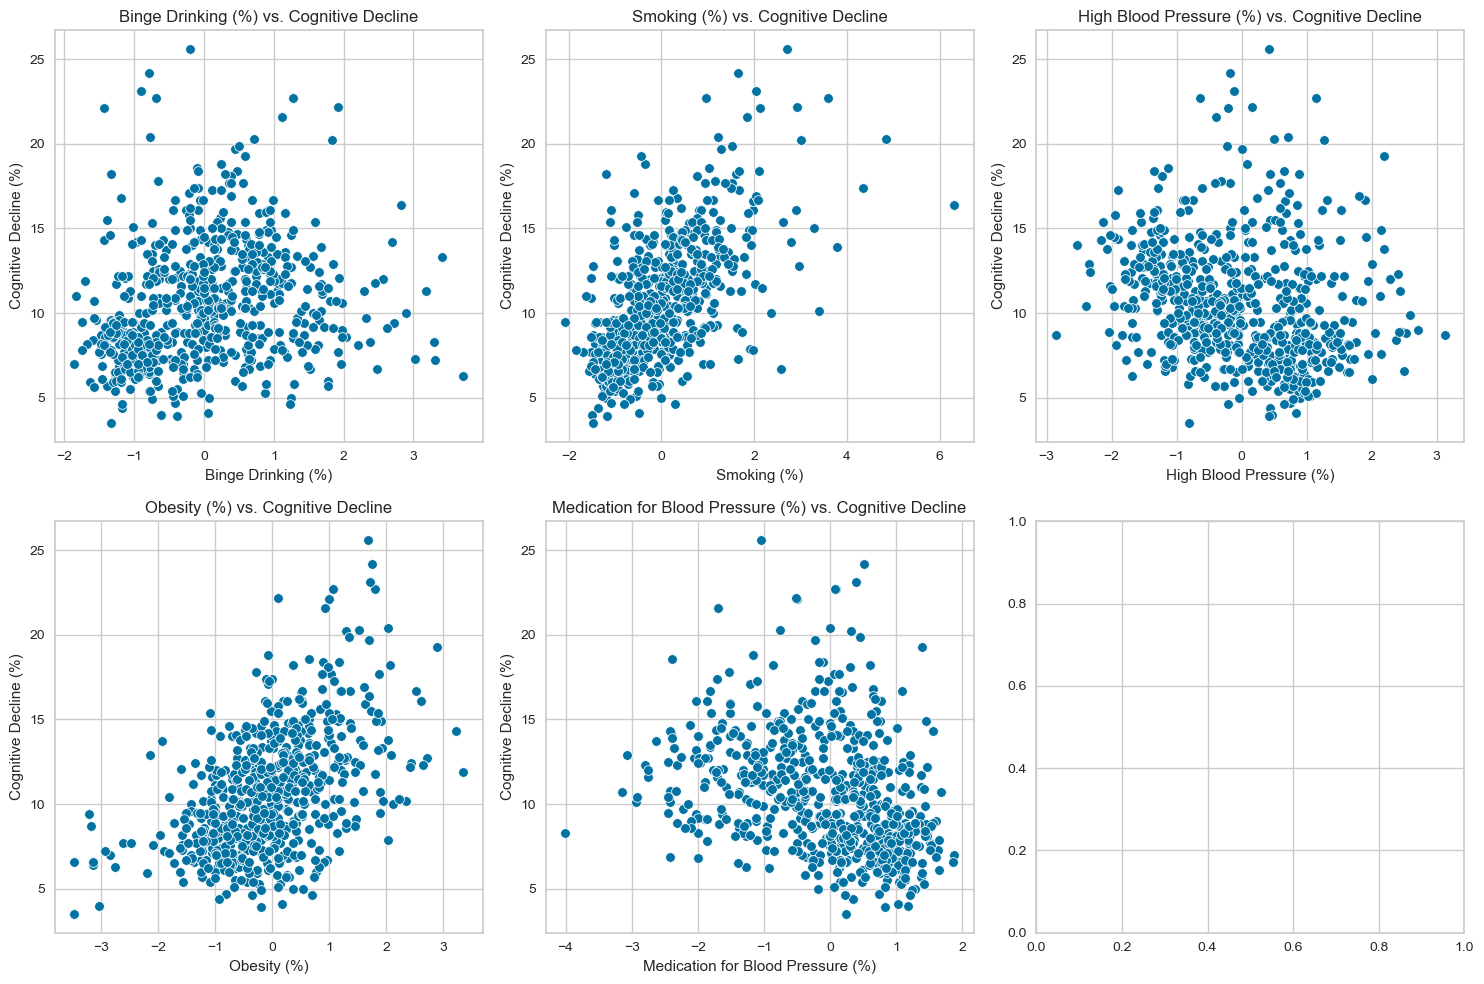

In [60]:
# Define predictor variable names
predictor_names = [
    "Binge Drinking (%)", "Smoking (%)", "High Blood Pressure (%)", 
    "Obesity (%)", "Medication for Blood Pressure (%)"
]

# Create scatter plots for each predictor
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.scatterplot(x=knn_X_test[:, i], y=knn_y_test, ax=axes[i])
    axes[i].set_xlabel(predictor_names[i])
    axes[i].set_ylabel("Cognitive Decline (%)")
    axes[i].set_title(f"{predictor_names[i]} vs. Cognitive Decline")

plt.tight_layout()
plt.show()

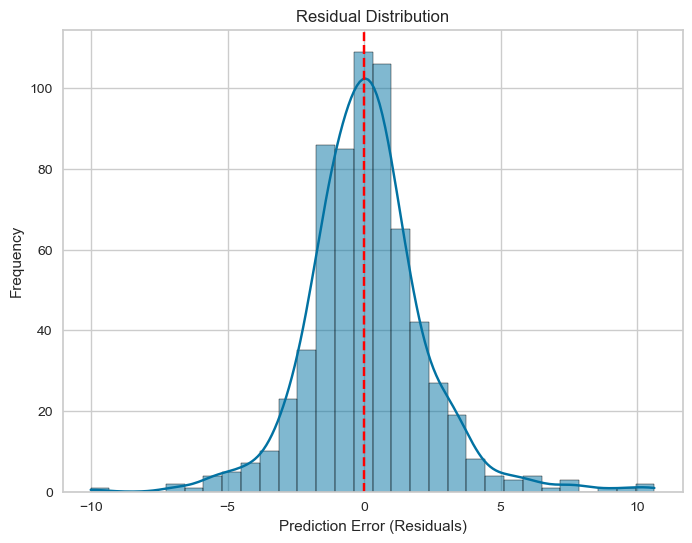

In [61]:
# Compute residuals
residuals = knn_results_df['Actual'] - knn_results_df['Predicted']

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

### kNN Findings at a glance

The kNN model has a similar level of fit as the ANN model! At a glance, the kNN model 'appear's to having slightly higher variance with test data, which makes sense given the methodology of how the kNN model finds its predicted values only by finding nearest neighbors, while the ANN has more a more complex methodology of accurately making its predicitons. This variance is present in the larger "Predicted Values vs Actual Values" plot and the subsequent "Features vs Predicted Values" plots, when compared to the ANN. In addition, the Residuals for the kNN model are slightly negatively weighted, compared to the ANN's more even residual distribution, which could be a result of of this model's different train_test_split adding more (or less) variance in the test values compared to the ANN's, or these residuals could be a reflection of the reduced complexity of the kNN model. Those distinctions aside, the kNN model has a similar MAE compared to the ANN, with the kNN model's MAE at 1.55 to the ANN's 1.60.

#### In Conclusion

The purpose of the kNN model was exploratory in nature. In the event that the kNN model's results differed significantly from the ANN model's black box nature, this could have led to insights into the ANN's methodology and led to further questions about the integrity of the ANN's findings. That the kNN model is coming to similar findings instead further solidifies the results we are able to withdraw from our models, and indeed, reinforces our general conclusion. 

## In Summary

The primary objective of this project was to construct and evaluate machine learning models to predict the likelihood of subjective cognitive decline or memory loss among older adults, using a combination of demographic, health-related, and behavioral factors from the Alzheimer's Disease dataset. Our aim was to identify potential risk factors for cognitive decline, which could contribute to early detection and intervention strategies.

### Model Findings:

- **Adjusted Rand Index between K-means and GMM**: 0.70, indicating a high level of agreement between the two clustering algorithms. This suggests that both models are identifying similar groupings within the data.
  
- **Artificial Neural Network (ANN) Model Performance**: The ANN model achieved a **training loss of ~4.2**, a **test loss of ~4.7**, and a **Mean Absolute Error (MAE) of ~1.5**. These results suggest the model fits the training data well and generalizes effectively to unseen data, with an acceptable margin of error of about 1.5 percentage points in predictions.

- **Residual Distribution**: The residual distribution was very good, showing that the model's errors are randomly distributed and not biased in any particular direction.

- **k-Nearest Neighbors (kNN) Model Performance**: The results from kNN provided an improvement in the model’s performance, enhancing predictive accuracy. With a **Mean Absolute Error (MAE) of ~1.5**, the kNN suggests a similar fit to the data as the ANN model, reinforcing the the conclusions drawn from the data. That a separate, distinct model to the ANN performed on a unique split of training and test data came to a similar level of accuracy reveals that our findings were not a coincidence of data manipulation or faulty model generation, but are genuine results related to the integrity of the data set. 

### Visual and Model Insights:

Visually, the data suggests that **binge drinking, smoking, high blood pressure, and obesity** all play a significant role in cognitive decline. This aligns with our model’s findings, which show that these health risk factors are strongly correlated with subjective cognitive decline. The predictive models reinforce this by highlighting these factors as influential in determining the likelihood of cognitive issues. These results suggest that addressing these modifiable health behaviors could potentially mitigate the risk of cognitive decline in older adults.

### Limitations:

Despite the promising results, there were some limitations in our approach:

- **Key Pairing and Dataset Limitations**: One of the significant challenges we faced was the way we structured and paired the data using key identifiers. While this was necessary to align responses with relevant health behaviors, it significantly reduced the size of the dataset. Only the observations with matching keys were retained, leading to a substantial reduction. 
- **Model Generalization**: Although the models performed well with minimal overfitting, the restricted dataset may have impacted the model's ability to generalize to the broader population. 
- **Feature Selection**: While we focused on key risk factors like smoking, binge drinking, and obesity, additional features or more granular data may uncover further nuanced patterns, which could improve the predictive power of the models.
- **Survey Methodology**: The questions asked in the CDC's survey are not explicit health indicators for specific people, and are instead generalizations from subsets of different populations. In addition, the questions themselves do not prescribe direct medical prescriptions of health, lifestyle, and cognitive ability. For example, our feature regarding binge drinking is reporting whether the people engaging in the survey self-report binge drinking in the past 30 days. Though the intent of the question is clear, it precludes individuals who choose not to disclose accurately, or alcoholics who do not believe they binge drink, though a medical professional might disagree, or even individuals who *do* binge drink, but at the time of the survery, do not, for whatever reason, have access to alcohol. As a result, the question does not reveal an concrete level of understanding regarding individuals who binge drink, which calls into question the integrity of the result regarding binge drinking and cognitive decline.

### Insights

The data and models presented above create compelling findings. Both the kNN and ANN models suggest correlation between different lifestyles and increased or decreased likelihood of cognitive decline. That said, these findings are not concrete. Due to the nature of the survey's application and how the observations are recorded, any conclusions do not have strong empirical generalizability for an individual person. The explicit definition of our results would suggest the following:

1. **Positive Correlation between 'Binge Drinking and Cognitive Decline'**: Groups of people with similar categorization and stratification are more likely to answer ***yes*** to cognitive decline questions if they answer yes to binge drinking questions.
2. **Strong Positive Correlation between 'Smoking and Cognitive Decline'**: Groups of people [...] are more likely to answer ***yes*** to cognitive decline questions if they answer yes to smoking questions. This appears to be our strongest correlation found by the data, and seems to suggest a very strong relationship between answering yes to smoking and answering yes to cognitive decline.
3. **Weak Negative Correlation between 'High Blood Pressure and Cognitive Decline'**: Groups of people [...] are more likely to answer ***no*** to cognitive decline questions if they answer yes to having high blood pressure questions.
4. **Slight Positive Correlation between 'Obesity and Cognitive Decline'**: Groups of people [...] are more likely to answer ***yes*** to cognitive decline questions if they answer yes to obesity questions. This particular correlation has the most spread, and, while it does suggest a positive correlation, the strength of the correlation is perhaps our weakest from our data.
5. **Negative Correlation between 'Blood Pressure Medication and Cognitive Decline'**: Groups of people [...] are more likely to answer ***no*** to cognitive decline questions if they answer yes to taking high blood pressure medication. Though this initial understanding of the correlation was a bit confusing, two potential outcomes for why the data was related in this way arose. The first was that if a group of people are more likely to take medication for high blood pressure, they had a lower likelihood of experiencing cognitive decline. These seemed to suggest that people who take their medication regularly are more likely to be healthy and thus take care of their mental faculties, in addition to their physical ailments, like blood pressure. The alternate understanding, and in my opinion, perhaps the slightly more palatable of the two, is the inverse via Bayes Rule - if someone is experiencing cognitive decline, they are more likely to forgo, or forget, taking high blood pressure medication. 
   

### Conclusion:

Our predictive models showed promising results, providing valuable insights into the factors that could contribute to cognitive decline in older adults. The model’s performance, with minimal overfitting and a good residual distribution, suggests that it can generalize well to unseen data. Despite these successes, there is room for further refinement, particularly in enhancing feature selection and including more diverse data sources for greater accuracy. Overall, the model is a significant step toward developing tools for early detection and personalized intervention in cognitive health.
